In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

# Display/render images directly in notebook
from IPython.display import Image
%matplotlib inline 

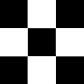

In [14]:
# Skip downloading, download manually

# Display image
Image(filename="./assets/checkerboard_18x18.png")
Image(filename="./assets/checkerboard_84x84.jpg")

In [15]:
# Start reading images with OpenCV
cb_image = cv2.imread("./assets/checkerboard_18x18.png", 0)
# filename, flags - flags determine if image is grayscale, color 
print(cb_image)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

Image size  (18, 18)
Data type of image  uint8


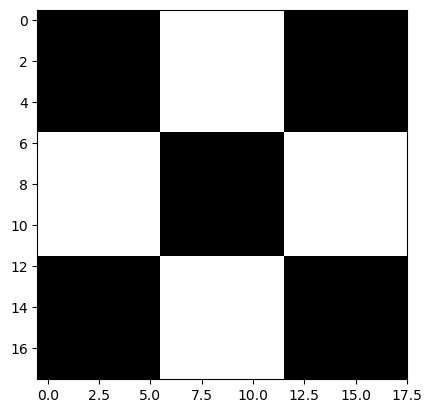

In [19]:
# Getting attributes of the image
print("Image size ", cb_image.shape)


print("Data type of image ", cb_image.dtype)

# Display the image with plt
plt.imshow(cb_image)

# Does not render as gray scale image >> set cmap="gray"
plt.imshow(cb_image, cmap="gray")

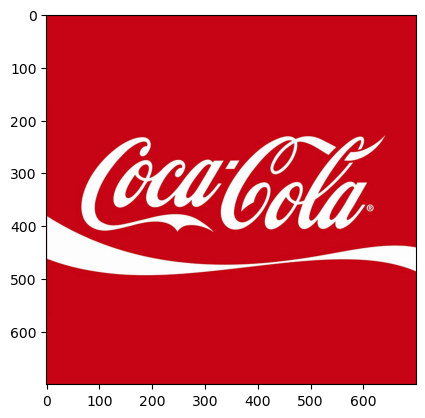

In [21]:
# OpenCV stores images in BGR format, matplotlib expects images in RGB format. To display color, image channels need to be revrsed
# BGR is used because at the time OpenCV was made BGR was more common than RGB

coke_img = cv2.imread("assets/coca-cola-logo.png", 1)
plt.imshow(coke_img) # Will not show image properly (BGR to RGB)

reversed_coke_img = coke_img[:,:,::-1] # Swapping color channels B and R by reversing array R-->B now B-->R
plt.imshow(reversed_coke_img)


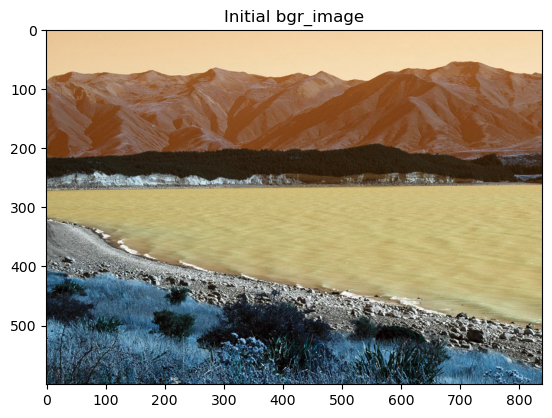

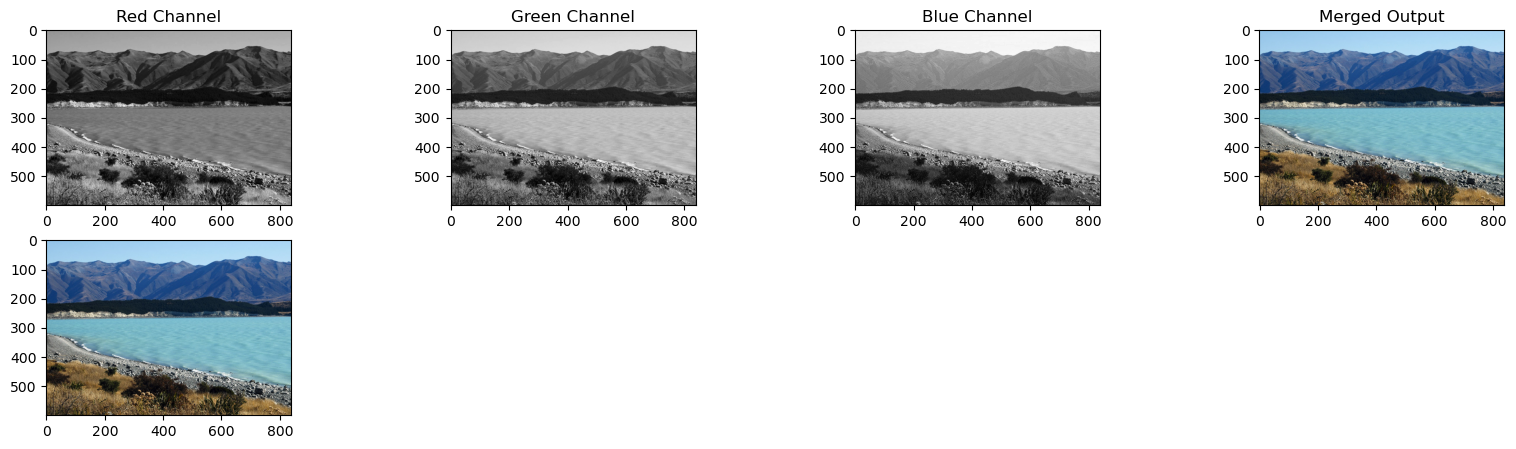

In [72]:
# Color channel splitting + merging

bgr_image = cv2.imread('assets/New_Zealand_Lake.jpg', cv2.IMREAD_COLOR)
plt.subplot(111);plt.imshow(bgr_image);plt.title("Initial bgr_image")

# Split channels
b, g, r = cv2.split(bgr_image)

# Show different separated channels
plt.figure(figsize=[20, 5])

plt.subplot(241);plt.imshow(r, cmap="gray");plt.title("Red Channel")
plt.subplot(242);plt.imshow(g, cmap="gray");plt.title("Green Channel")
plt.subplot(243);plt.imshow(b, cmap="gray");plt.title("Blue Channel")

# Merge channels into one
merged_bgr_image = cv2.merge((b, g, r))
plt.subplot(244)
plt.imshow(merged_bgr_image[:, :, ::-1]) # reverse color channels - without reversing it looks high contrast too
plt.title("Merged Output")

# Convert to different color space
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB) # this means that there was no need to reverse color channels manually
plt.subplot(245)
plt.imshow(rgb_image)

# subplots are confusing